<a href="https://colab.research.google.com/github/fernanda0402/Big-Data-Astro/blob/main/Exerc%C3%ADcio_notebook_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exercício do notebook 5 de Big Data e Astroinformática**

Photometric redshifts with Dense Network

Baixando o arquivo fits:

In [17]:
!wget specz_catalog_ecbpf.fits "https://www.dropbox.com/s/38zmuj2zxuoigzk/specz_catalog_XIIIecbpf.fits?dl=0"
!ls

--2021-11-30 18:01:03--  http://specz_catalog_ecbpf.fits/
Resolving specz_catalog_ecbpf.fits (specz_catalog_ecbpf.fits)... failed: Name or service not known.
wget: unable to resolve host address ‘specz_catalog_ecbpf.fits’
--2021-11-30 18:01:03--  https://www.dropbox.com/s/38zmuj2zxuoigzk/specz_catalog_XIIIecbpf.fits?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/38zmuj2zxuoigzk/specz_catalog_XIIIecbpf.fits [following]
--2021-11-30 18:01:03--  https://www.dropbox.com/s/raw/38zmuj2zxuoigzk/specz_catalog_XIIIecbpf.fits
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbf5d2322d76fbd3464fbc4caf8.dl.dropboxusercontent.com/cd/0/inline/Ba_qYQb8mVoEVji47Q381Gw6Jvk2WblA7luEuiH2SHfxmX5oISFRexuslt0fhOauvpWvJT6pTnEVzhxr3bBk2W

In [18]:
from astropy.io import fits
import os
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import pandas as pd

def open_fits_catalog(fits_file):
    hdu_list=fits.open(fits_file, ignore_missing_end=True)
    #print hdu_list
    hdu = hdu_list[1]    # table extensions can't be the first extension, so there's a dummy image extension at 0
    #print hdu.header
    cat_table = Table(hdu.data)
    cols=hdu.columns
    return cat_table, cols

In [19]:
dados_dir = '/content/specz_catalog_XIIIecbpf.fits'

data, _ = open_fits_catalog(dados_dir)

In [20]:
df=data.to_pandas()
df

,ra,dec,class,z,zErr,petroMag_u,petroMagErr_u,petroMag_g,petroMagErr_g,petroMag_r,petroMagErr_r,petroMag_i,petroMagErr_i
0,146.622820,-0.951385,GALAXY,0.371128,0.000069,22.40671,0.9912677,20.32166,0.09126051,18.62304,0.03089815,18.05202,0.03665525
1,146.592720,-0.760256,GALAXY,0.064959,0.000009,19.03327,0.089179,17.4961,0.01081754,16.91567,0.01007535,16.50206,0.01019981
2,146.910800,-0.074559,GALAXY,0.242272,0.000086,20.18482,0.2964447,19.53431,0.08892172,18.03267,0.03387981,17.43746,0.04512536
3,146.448310,-0.713400,GALAXY,0.114698,0.000008,18.94475,0.04721325,17.98683,0.009779428,17.451,0.009233744,17.02182,0.008778921
4,146.788470,-0.310658,GALAXY,0.056562,0.000015,20.73877,0.4804843,18.73327,0.03666106,18.14503,0.03382286,17.86618,0.03925543
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175916,16.005106,-0.855950,GALAXY,0.065073,0.000007,18.20492,0.05129132,17.21942,0.01060271,16.86439,0.008551153,16.60081,0.01340905
175917,15.651509,-0.637366,GALAXY,0.191312,0.000035,20.34421,0.2486131,18.83951,0.03180256,17.65709,0.01682307,17.13594,0.01566291
175918,15.866415,-1.159094,GALAXY,0.137276,0.000023,19.12054,0.08667219,17.90217,0.01617296,17.00707,0.009945687,16.62113,0.01116389
175919,15.624099,-0.813441,GALAXY,0.237502,0.000043,20.28428,0.2404259,18.76537,0.03047216,17.38507,0.02042167,16.88052,0.01921708


key= petroMag_u
min= -9999   
max= null    


TypeError: ignored

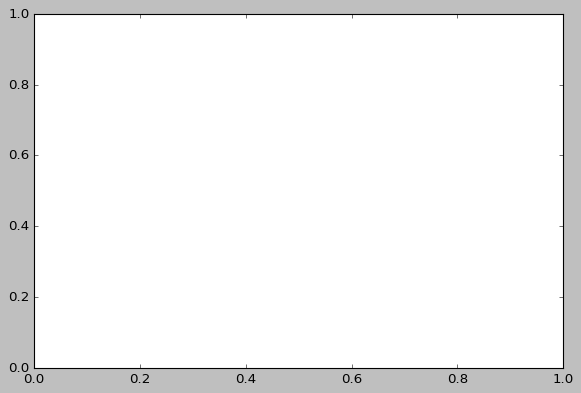

In [21]:
### MAG PLOTS

#mags = ['petroMag_'+band for band in 'ugriz']
mags = ['petroMag_'+band for band in 'ugri'] #não existe petroMag_z

key_list = mags 
color_list = ['black', 'green', 'red', 'tomato', 'palevioletred']
hor = 2
ver = 3

plt.style.use('classic')

fig = plt.figure(figsize=(14, 14), constrained_layout=True)
gs = fig.add_gridspec(ver, hor, left=0.05, right=0.5, wspace=0.05)

i=0
binsize=0.2
def binarange(arr):
    minimo = min(arr)
    print('min=',minimo)
    maximo = max(arr)
    print('max=',maximo)
    return np.arange(minimo, maximo+binsize, binsize)

bins=[0]*len(key_list)

for v in range(ver):
    for h in range(hor):
        if v==2:
            ax = fig.add_subplot(gs[v, 0])
            for c, key in enumerate(key_list):
                #bins = binarange(df(key))
                ax.hist(df[key], bins=bins[c], color=color_list[c], alpha=1, label=key, histtype='step')
            ax.set_title("All Mags")
            plt.legend()
            
            break
       
        print('key=',key_list[i])
        ax = fig.add_subplot(gs[v, h])
        bins[i] = binarange(df[key_list[i]])
        ax.hist(df[key_list[i]], bins=bins[i], color=color_list[i], alpha=0.7)
        ax.set_title(key_list[i])
        i+=1

plt.show